In [1]:
import networkx as nx

def parse_regulation_file(file_path):
    # Create a directed graph to represent the network
    G = nx.DiGraph()

    # Open and read the file line by line
    with open(file_path, 'r') as file:
        current_regulator = None  # Initialize the current regulator variable
        for line in file:
            # Ignore lines starting with '#' or that are empty
            if line.startswith('#') or not line.strip():
                continue

            # Remove trailing whitespace from the line
            line = line.rstrip()

            # Check if a line does not start with an indent and also ends with an asterisk
            if not line.startswith('  ') and line.endswith('*'):
                # Remove the asterisk and set that as the current_regulator
                current_regulator = line[:-1].strip()
                # Make first letter uppercase
                current_regulator = current_regulator[0].upper() + current_regulator[1:]
                # If the current regulator is not already in the graph, add it
                if current_regulator not in G:
                    G.add_node(current_regulator)
            elif current_regulator and line.startswith('  '):
                # Process the regulatees
                regulatees = line.strip().split()
                for regulatee in regulatees:
                    # Determine the polarity and adjust slicing accordingly
                    if regulatee.startswith('+/-'):
                        polarity = '+/-'
                        gene = regulatee[3:]
                    elif regulatee.startswith('+') or regulatee.startswith('-'):
                        polarity = regulatee[0]
                        gene = regulatee[1:]
                    else:
                        polarity = None
                        gene = regulatee

                    # Remove the trailing asterisk if present
                    gene = gene.rstrip('*')
                    # Make first letter uppercase
                    gene = gene[0].upper() + gene[1:]

                    # If the regulatee is not in the graph, add it
                    if gene not in G:
                        G.add_node(gene)
                    # Add an edge between the current_regulator and the regulatee with the polarity as an attribute
                    G.add_edge(current_regulator, gene, polarity=polarity)
    return G


# Usage
file_path = './ECOLI-regulatory-network.txt'  # Replace with your actual file path
ecoli_network = parse_regulation_file(file_path)

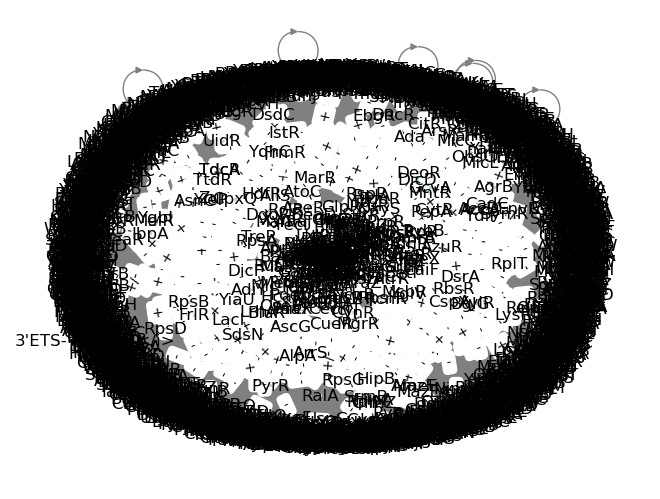

In [2]:
import matplotlib.pyplot as plt

# Function to draw the network
def draw_network(G):
    pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
    nx.draw(G, pos, with_labels=True, node_size=2, node_color='lightblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'polarity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

# Draw the network
draw_network(ecoli_network)

In [3]:
def get_gene_subgraph(G, gene_list):
    # Initialize a set for all the nodes in the subgraph
    subgraph_nodes = set()

    # For each gene in the list, find all descendants and ancestors
    for gene in gene_list:
        if gene in G:
            descendants = nx.descendants(G, gene)
            # Add the descendants to the subgraph nodes set
            subgraph_nodes.update(descendants)

            # For each descendant, find all ancestors and add them to the set
            for desc in descendants:
                ancestors = nx.ancestors(G, desc)
                subgraph_nodes.update(ancestors)
        else:
            print(f'{gene} not found in graph.')

    # Create the subgraph from the full graph using the nodes in the set
    subgraph = G.subgraph(subgraph_nodes)

    return subgraph

# Try all genes at once
gene_list = ["TyrR", "FadR", "LacI"] 
subgraph = get_gene_subgraph(ecoli_network, gene_list)

print(f'ecoli graph: n nodes: {len(ecoli_network.nodes())}, n edges: {len(ecoli_network.edges())}')
print(f'ecoli subgraph for {gene_list}: n nodes: {len(subgraph.nodes())}, n edges: {len(subgraph.edges())}')

# save graph
gene_string = '_'.join(gene_list)
output_filename = f"ecoli_subgraph_{gene_string}"
nx.write_gexf(subgraph, f"{output_filename}.gexf")
nx.write_adjlist(subgraph, f"{output_filename}.txt")


ecoli graph: n nodes: 3042, n edges: 9678
ecoli subgraph for ['TyrR', 'FadR', 'LacI']: n nodes: 152, n edges: 727


In [9]:
# Try individual genes
gene_list = ["TyrR", "FadR", "LacI"] 
print(f'ecoli graph: n nodes: {len(ecoli_network.nodes())}, n edges: {len(ecoli_network.edges())}')
for gene in gene_list:
    subgraph = get_gene_subgraph(ecoli_network, [gene])
    print(f'ecoli subgraph for {gene}: n nodes: {len(subgraph.nodes())}, n edges: {len(subgraph.edges())}')

    # save graph
    gene_string = gene
    output_filename = f"ecoli_subgraph_{gene_string}"
    nx.write_gexf(subgraph, f"{output_filename}.gexf")
    nx.write_adjlist(subgraph, f"{output_filename}.txt")

ecoli graph: n nodes: 3042, n edges: 9678
ecoli subgraph for TyrR: n nodes: 118, n edges: 574
ecoli subgraph for FadR: n nodes: 134, n edges: 655
ecoli subgraph for LacI: n nodes: 108, n edges: 536


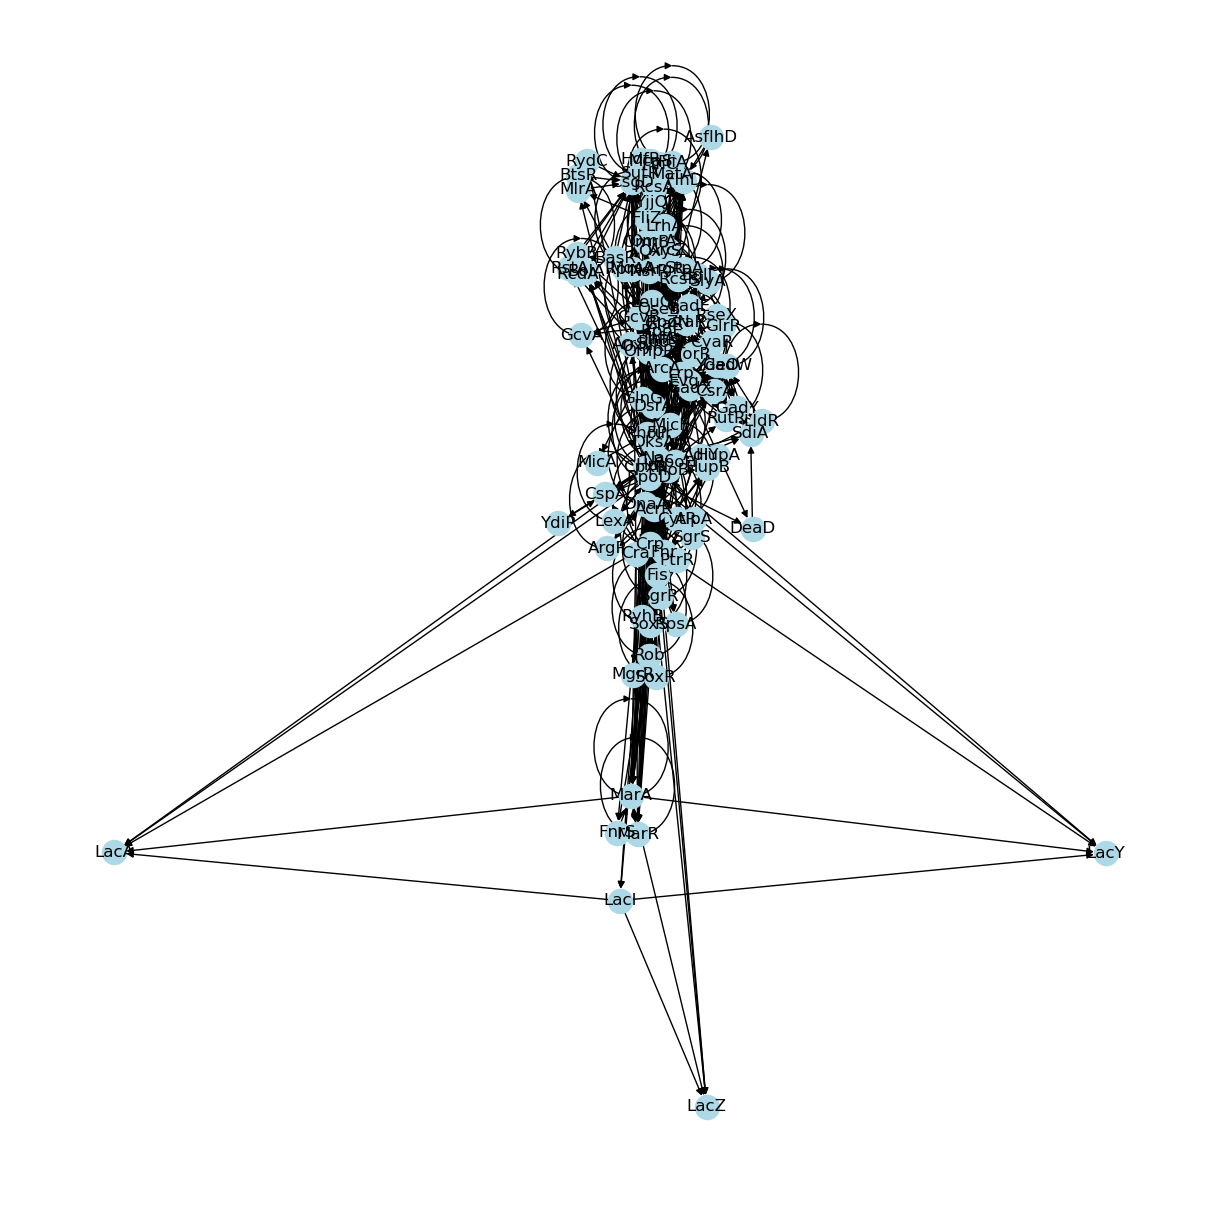

In [10]:

# If you want to visualize the subgraph, you can use the following code:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nx.draw(subgraph, with_labels=True, node_color='lightblue', arrows=True)
plt.show()